In [1]:
import networkx as nx
from math import *
from numpy import pi

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [3]:
from qiskit.circuit.library import MCMT, RZGate
from qiskit.quantum_info import random_unitary
from qiskit.quantum_info import Operator

In [4]:
#from qiskit.quantum_info import Statevector
import numpy as np

In [5]:
from qiskit import __version__
print(__version__)

1.1.1


In [6]:
# Create a new circuit with two qubits
n = 3
q = QuantumRegister(n, 'qubit')
c = ClassicalRegister(n, 'bit')
qc = QuantumCircuit(q, c)

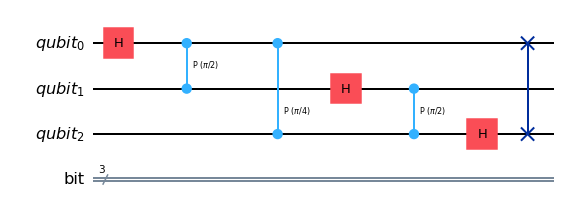

In [7]:
#qft 
qc.h(0)
qc.cp(np.pi/2,1,0)
qc.cp(np.pi/4,2,0)
qc.h(1)
qc.cp(np.pi/2,2,1)
qc.h(2)
qc.swap(0,2)

qc.draw('mpl')

In [10]:
n = 3
q = QuantumRegister(n, 'qubit')
c = ClassicalRegister(n, 'bit')
qc1 = QuantumCircuit(q, c)

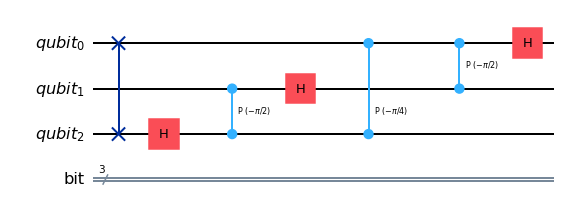

In [11]:
#qft inverse
qc1.swap(0,2)
qc1.h(2)
qc1.cp(-pi/2,2,1)
qc1.h(1)
qc1.cp(-pi/4,2,0)
qc1.cp(-pi/2,1,0)
qc1.h(0)


qc1.draw('mpl')

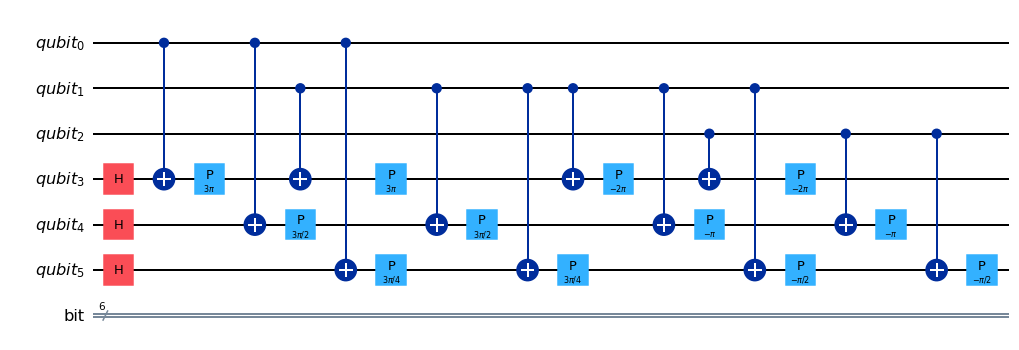

In [48]:
n = 6
q = QuantumRegister(n, 'qubit')
c = ClassicalRegister(n, 'bit')
qce = QuantumCircuit(q, c)

qce.h(3)
qce.h(4)
qce.h(5)

# Suponiendo que los dos primeros qubits son de control y los siguientes tres son de objetivo
qce.cx(0, 3)
qce.p(3*np.pi, 3)
qce.cx(0, 4)
qce.p(3*np.pi/2, 4)
qce.cx(0, 5)
qce.p(3*np.pi/4, 5)
qce.cx(1, 3)
qce.p(3*np.pi, 3)
qce.cx(1, 4)
qce.p(3*np.pi/2, 4)
qce.cx(1, 5)
qce.p(3*np.pi/4, 5)

qce.cx(1, 3)
qce.p(-2*np.pi, 3)
qce.cx(1, 4)
qce.p(-2*np.pi/2, 4)
qce.cx(1, 5)
qce.p(-2*np.pi/4, 5)
qce.cx(2, 3)
qce.p(-2*np.pi, 3)
qce.cx(2, 4)
qce.p(-2*np.pi/2, 4)
qc1e.cx(2, 5)
qc1.p(-2*np.pi/4, 5)

qc1.draw('mpl')

In [10]:
from qiskit_aer.aerprovider import AerSimulator

In [12]:
def counting_to_probability(contagem):
    m = sum(list(contagem.values()))
    n = len(list(contagem.keys())[0])
    L = [bin(i)[2:] for i in range(2**n)]
    L = list(map(lambda x: '0'*(n-len(x))+x,L))
    return {j:contagem[j]/m for j in contagem.keys()}
#qc.measure(q, c)

In [51]:
#grover_circuit.measure([0,1,2,3,4],[0,1,2,3,4])
qc1.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
#grover_circuit.measure_q[0]
#grover_circuit.measure_q[1]

aer_sim = AerSimulator()
#pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
#isa_qc = pm.run(grover_circuit)


#aer_sim = aer.get_backend('aer_simulator')
qobj = assemble(qc1, shots = 10000)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
probs = counting_to_probability(counts)
#counts

/tmp/ipykernel_10513/771211521.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


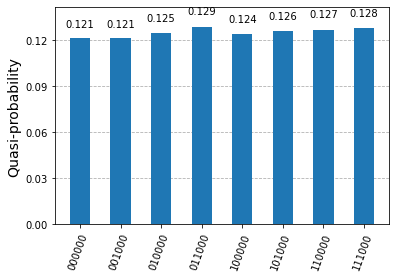

In [52]:
plot_histogram(probs)

In [54]:
sorted_probs = dict(sorted(probs.items()))
sorted_probs

{'000000': 0.1214,
 '001000': 0.1211,
 '010000': 0.1247,
 '011000': 0.1286,
 '100000': 0.1242,
 '101000': 0.1256,
 '110000': 0.1266,
 '111000': 0.1278}

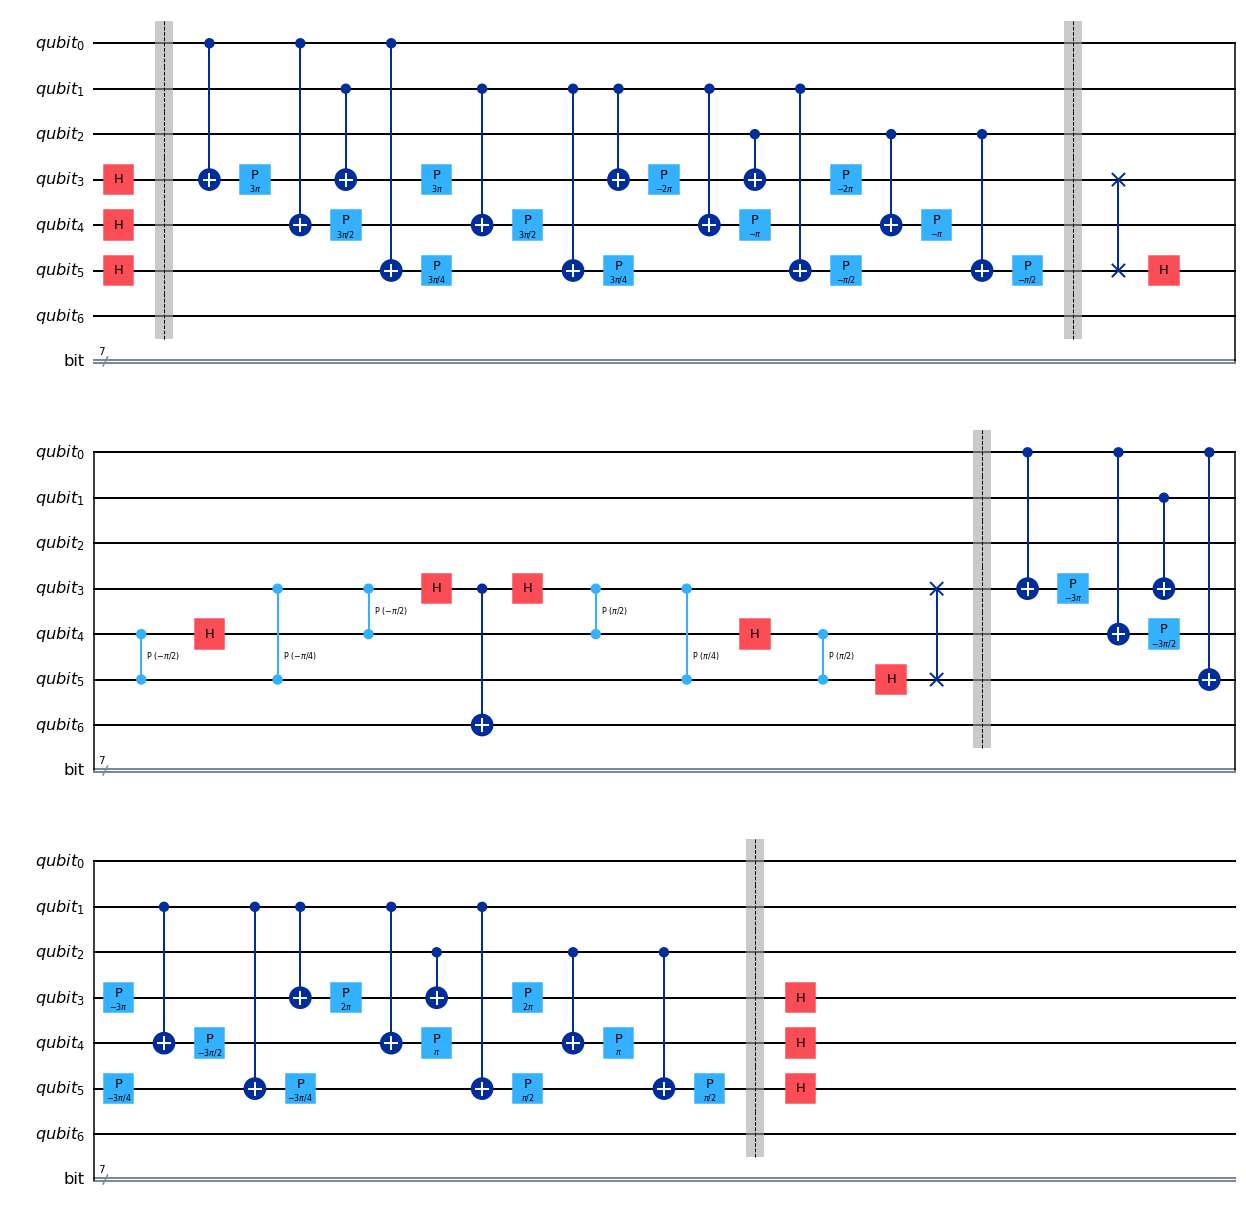

In [36]:
#Gas final
n = 7
q = QuantumRegister(n, 'qubit')
c = ClassicalRegister(n, 'bit')
qcf = QuantumCircuit(q, c)

qcf.h(3)
qcf.h(4)
qcf.h(5)
qcf.barrier(0,1,2,3,4,5,6)

# Suponiendo que los dos primeros qubits son de control y los siguientes tres son de objetivo
qcf.cx(0, 3)
qcf.p(3*np.pi, 3)
qcf.cx(0, 4)
qcf.p(3*np.pi/2, 4)
qcf.cx(0, 5)
qcf.p(3*np.pi/4, 5)
qcf.cx(1, 3)
qcf.p(3*np.pi, 3)
qcf.cx(1, 4)
qcf.p(3*np.pi/2, 4)
qcf.cx(1, 5)
qcf.p(3*np.pi/4, 5)

qcf.cx(1, 3)
qcf.p(-2*np.pi, 3)
qcf.cx(1, 4)
qcf.p(-2*np.pi/2, 4)
qcf.cx(1, 5)
qcf.p(-2*np.pi/4, 5)
qcf.cx(2, 3)
qcf.p(-2*np.pi, 3)
qcf.cx(2, 4)
qcf.p(-2*np.pi/2, 4)
qcf.cx(2, 5)
qcf.p(-2*np.pi/4, 5)

qcf.barrier(0,1,2,3,4,5,6)

qcf.swap(3,5)
qcf.h(5)
qcf.cp(-pi/2,5,4)
qcf.h(4)
qcf.cp(-pi/4,5,3)
qcf.cp(-pi/2,4,3)
qcf.h(3)

qcf.cx(3,6)

qcf.h(3)
qcf.cp(np.pi/2,4,3)
qcf.cp(np.pi/4,5,3)
qcf.h(4)
qcf.cp(np.pi/2,5,4)
qcf.h(5)
qcf.swap(3,5)

qcf.barrier(0,1,2,3,4,5,6)
#####################################################################
qcf.cx(0, 3)
qcf.p(-3*np.pi, 3)
qcf.cx(0, 4)
qcf.p(-3*np.pi/2, 4)
qcf.cx(0, 5)
qcf.p(-3*np.pi/4, 5)
qcf.cx(1, 3)
qcf.p(-3*np.pi, 3)
qcf.cx(1, 4)
qcf.p(-3*np.pi/2, 4)
qcf.cx(1, 5)
qcf.p(-3*np.pi/4, 5)

qcf.cx(1, 3)
qcf.p(2*np.pi, 3)
qcf.cx(1, 4)
qcf.p(2*np.pi/2, 4)
qcf.cx(1, 5)
qcf.p(2*np.pi/4, 5)
qcf.cx(2, 3)
qcf.p(2*np.pi, 3)
qcf.cx(2, 4)
qcf.p(2*np.pi/2, 4)
qcf.cx(2, 5)
qcf.p(2*np.pi/4, 5)

qcf.barrier(0,1,2,3,4,5,6)
qcf.h(3)
qcf.h(4)
qcf.h(5)


qcf.draw('mpl')

In [37]:
unitary_matrix = Operator(qcf).data
print(unitary_matrix)

[[ 1.00000000e+00+7.45920511e-18j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -3.37652164e-17+5.55111512e-17j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   3.08148791e-32-5.44735250e-33j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  1.46446609e-01+1.36764169e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+

In [13]:
#grover_circuit.measure([0,1,2,3,4],[0,1,2,3,4])
qcf.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
#grover_circuit.measure_q[0]
#grover_circuit.measure_q[1]

aer_sim = AerSimulator()
#pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
#isa_qc = pm.run(grover_circuit)


#aer_sim = aer.get_backend('aer_simulator')
qobjf = assemble(qcf, shots = 10000)
resultf = aer_sim.run(qobjf).result()
countsf = resultf.get_counts()
probsf = counting_to_probability(countsf)
#counts

/tmp/ipykernel_8133/3832565894.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  resultf = aer_sim.run(qobjf).result()


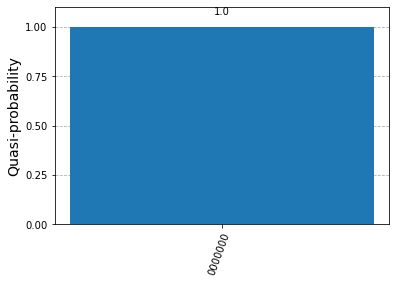

In [14]:
plot_histogram(probsf)

In [15]:
sorted_probsf = dict(sorted(probsf.items()))
sorted_probsf

{'0000000': 1.0}